In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,roc_auc_score

import json
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Boston_Cleaned_Data.csv')
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [4]:
x = df.drop('MEDV',axis=1)
x

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y = df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#### Feature Selection using Random Forest

- Random Forests are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

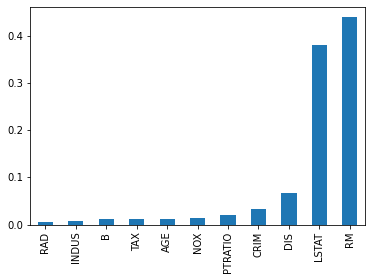

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
rfc = RandomForestRegressor(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_importances = pd.Series(rfc.feature_importances_, index=x.columns).sort_values()
rfc_importances.plot(kind='bar')
plt.show()

- Observation:
 - We can see that the Important features are sorted in ascending order, along with their importance in the form of bar graph.
 - We can clearly observe that LSTAT, RM, DIS and CRIM are the most important features that can be used for prediction.
 - This means that we can ignore the other columns for the House price prediction.

In [12]:
feature_select = ['LSTAT','RM','DIS','CRIM','PTRATIO','AGE','B','NOX']
x[feature_select].head()

,LSTAT,RM,DIS,CRIM,PTRATIO,AGE,B,NOX
0,4.98,6.575,4.0900,0.00632,15.3,65.2,396.90,0.538
1,9.14,6.421,4.9671,0.02731,17.8,78.9,396.90,0.469
2,4.03,7.185,4.9671,0.02729,17.8,61.1,392.83,0.469
3,2.94,6.998,6.0622,0.03237,18.7,45.8,394.63,0.458
4,5.33,7.147,6.0622,0.06905,18.7,54.2,396.90,0.458


In [13]:
x_feature_select = x[feature_select]
x_feature_select

,LSTAT,RM,DIS,CRIM,PTRATIO,AGE,B,NOX
0,4.98,6.575,4.0900,0.00632,15.3,65.2,396.90,0.538
1,9.14,6.421,4.9671,0.02731,17.8,78.9,396.90,0.469
2,4.03,7.185,4.9671,0.02729,17.8,61.1,392.83,0.469
3,2.94,6.998,6.0622,0.03237,18.7,45.8,394.63,0.458
4,5.33,7.147,6.0622,0.06905,18.7,54.2,396.90,0.458
...,...,...,...,...,...,...,...,...
501,9.67,6.593,2.4786,0.06263,21.0,69.1,391.99,0.573
502,9.08,6.120,2.2875,0.04527,21.0,76.7,396.90,0.573
503,5.64,6.976,2.1675,0.06076,21.0,91.0,396.90,0.573
504,6.48,6.794,2.3889,0.10959,21.0,89.3,393.45,0.573


#### Scaling the feature variables using MinMaxScaler


In [14]:
mms = MinMaxScaler()
arr = mms.fit_transform(x_feature_select)
x_scaled = pd.DataFrame(arr,columns=x_feature_select.columns)
x_scaled.head()

,LSTAT,RM,DIS,CRIM,PTRATIO,AGE,B,NOX
0,0.089680,0.577505,0.269203,0.000000,0.287234,0.641607,1.000000,0.314815
1,0.204470,0.547998,0.348962,0.000714,0.553191,0.782698,1.000000,0.172840
2,0.063466,0.694386,0.348962,0.000713,0.553191,0.599382,0.987043,0.172840
3,0.033389,0.658555,0.448545,0.000886,0.648936,0.441813,0.992773,0.150206
4,0.099338,0.687105,0.448545,0.002133,0.648936,0.528321,1.000000,0.150206


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 8)
(152, 8)
(354,)
(152,)


#### Model building

In [16]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_test_pred = rfr.predict(x_test)
y_train_pred = rfr.predict(x_train)

In [18]:
print("Testing Data Evaluation")
print("*"*80)
mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
print("*"*80)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
print("*"*80)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
print("*"*80)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

Testing Data Evaluation
********************************************************************************
MSE:  10.13424233552631
********************************************************************************
RMSE:  3.183432476985543
********************************************************************************
MAE:  2.122835526315788
********************************************************************************
R2 Score:  0.8639938086279616


In [19]:
print("Training Data Evaluation")
print("*"*80)
mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
print("*"*80)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
print("*"*80)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
print("*"*80)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

Training Data Evaluation
********************************************************************************
MSE:  2.139492132768359
********************************************************************************
RMSE:  1.4627002880865099
********************************************************************************
MAE:  0.9361779661016935
********************************************************************************
R2 Score:  0.9756589691647565


#### Hyper Parameter Tuning

In [20]:
rf_model = RandomForestRegressor()

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':["squared_error", "absolute_error", "poisson"],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'max_features':['sqrt'],
                   'random_state':[11]
                   }

gscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 5)
gscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'random_state': [11]})

In [21]:
gscv_rf_model.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=7,
                      max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=4, n_estimators=74, random_state=11)

In [22]:
gscv_rf_model.best_params_

{'random_state': 11,
 'n_estimators': 74,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'absolute_error'}

In [23]:
rf_reg = gscv_rf_model.best_estimator_

In [24]:
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

In [25]:
print("Testing Data Evaluation")
print("*"*80)
mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
print("*"*80)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
print("*"*80)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
print("*"*80)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

Testing Data Evaluation
********************************************************************************
MSE:  12.351863826842488
********************************************************************************
RMSE:  3.514521848963595
********************************************************************************
MAE:  2.2587748933143663
********************************************************************************
R2 Score:  0.8342323086605317


In [26]:
print("Training Data Evaluation")
print("*"*80)
mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
print("*"*80)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
print("*"*80)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
print("*"*80)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

Training Data Evaluation
********************************************************************************
MSE:  8.163478994626779
********************************************************************************
RMSE:  2.857180252386394
********************************************************************************
MAE:  1.8875744388456248
********************************************************************************
R2 Score:  0.9071239894329691


#### model file creation

In [29]:
x_scaled.columns.to_list()

['LSTAT', 'RM', 'DIS', 'CRIM', 'PTRATIO', 'AGE', 'B', 'NOX']

In [30]:
encoder = {'columns':x_scaled.columns.to_list()}
encoder

{'columns': ['LSTAT', 'RM', 'DIS', 'CRIM', 'PTRATIO', 'AGE', 'B', 'NOX']}

In [31]:
with open('boston_encoder.json','w') as f:
    json.dump(encoder,f)

In [32]:
with open('boston_model.pkl','wb') as f:
    pickle.dump(rf_reg,f)

In [33]:
with open('boston_scalar.pkl','wb') as f:
    pickle.dump(mms,f)

#### user input testing

In [34]:
with open('boston_encoder.json','r') as f:
    test_enc = json.load(f)
test_enc

{'columns': ['LSTAT', 'RM', 'DIS', 'CRIM', 'PTRATIO', 'AGE', 'B', 'NOX']}

In [35]:
with open('boston_model.pkl','rb') as f:
    test_model = pickle.load(f)
test_model

RandomForestRegressor(criterion='absolute_error', max_depth=7,
                      max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=4, n_estimators=74, random_state=11)

In [36]:
with open('boston_scalar.pkl','rb') as f:
    test_scalar = pickle.load(f)
test_scalar

MinMaxScaler()

In [37]:
test_arr = np.zeros(len(test_enc['columns']))
test_arr

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
NOX = 0.538
B = 396.90
AGE = 65.2
PTRATIO = 15.3
CRIM = 0.02763
DIS = 4.0900
RM = 6.575
LSTAT = 4.98

In [52]:
for i in x_feature_select.columns:
    print(f'"{i}" :')

"LSTAT" :
"RM" :
"DIS" :
"CRIM" :
"PTRATIO" :
"AGE" :
"B" :
"NOX" :


In [39]:
test_arr[0] = LSTAT
test_arr[1] = RM
test_arr[2] = DIS
test_arr[3] = CRIM
test_arr[4] = PTRATIO
test_arr[5] = AGE
test_arr[6] = B
test_arr[7] = NOX

test_arr

array([4.980e+00, 6.575e+00, 4.090e+00, 2.763e-02, 1.530e+01, 6.520e+01,
       3.969e+02, 5.380e-01])

In [40]:
test_arr = test_scalar.transform([test_arr])
test_arr

array([[8.96799117e-02, 5.77505269e-01, 2.69203139e-01, 7.24538173e-04,
        2.87234043e-01, 6.41606591e-01, 1.00000000e+00, 3.14814815e-01]])

In [53]:
test_model.predict(test_arr)[0]

26.91418918918918

In [42]:
y_train.head(1)

5    28.7
Name: MEDV, dtype: float64

In [43]:
y_train_pred[0]

25.995945945945948